# Color Quantization using $L=3$ Vector Quantization

This code is provided as supplementary material of the lecture Quellencodierung (QC).<br>

This code illustrates
* The use of a vector quantizer to generate paletted images with $\log_2(K)$ bit/pixel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
%matplotlib inline

Load an image, needs to be an RGB image (24 bit color information), best in png format to have unaltered color information

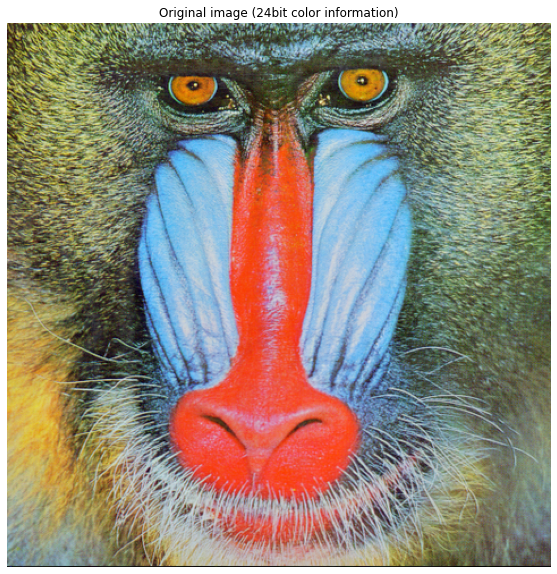

In [12]:
image = mpimg.imread('Mandrill.png')
plt.figure(1,figsize=(10,10))
plt.imshow(image)
plt.title('Original image (24bit color information)')
plt.axis('off')
plt.show()

Quantize the color information of the image. For this, we make use of the k-means algorithm from machine learning, which is essentially equivalent to the Linde-Buzo-Gray-Algorithm A. The resulting vector codebook clusters the 3d-color space into num_colors ($K$) distinct codebook entries. We then replace the image by the respective indices to the codebook.

In [4]:
def quantize_colors(image,num_colors):
    temp = np.reshape(image, (image.shape[0]*image.shape[1],3))
    
    kmeans = KMeans(n_clusters=num_colors, random_state=0, n_init=1, init='random').fit(temp)

    retval = kmeans.cluster_centers_[kmeans.labels_]
    return np.reshape(retval,(image.shape[0],image.shape[1],3))

***

Visualize the quantized images using 4, 16 and 64 numbers (any number would be possible)


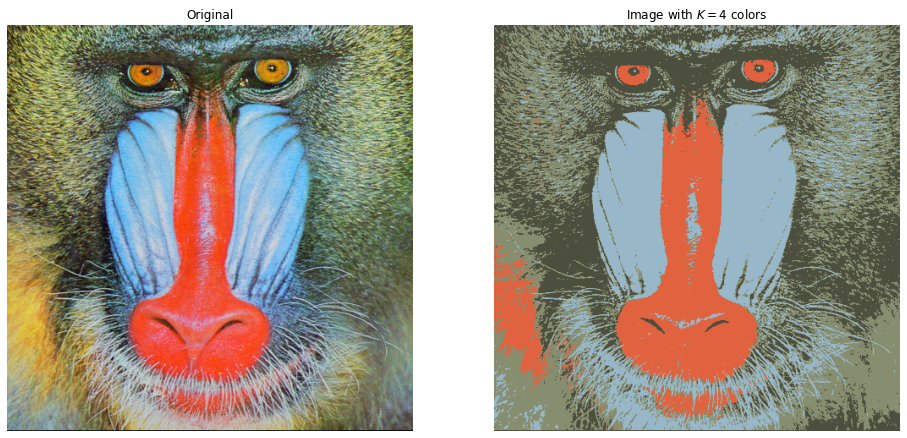

In [7]:
image_q = quantize_colors(image,4)

plt.figure(1,figsize=(16,8))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis('off')
plt.subplot(122)
plt.imshow(image_q)
plt.title('Image with $K=4$ colors')
plt.axis('off')
plt.show()

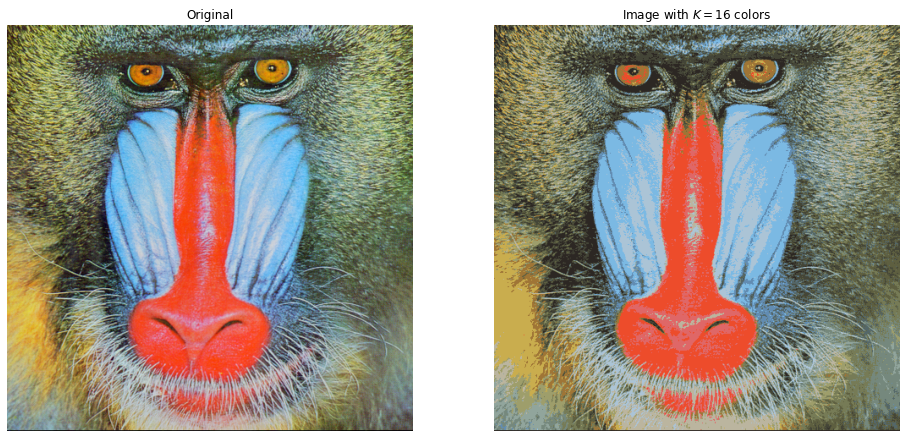

In [8]:
image_q = quantize_colors(image,16)

plt.figure(1,figsize=(16,8))
plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.title('Original')
plt.subplot(122)
plt.imshow(image_q)
plt.axis('off')
plt.title('Image with $K=16$ colors')
plt.show()

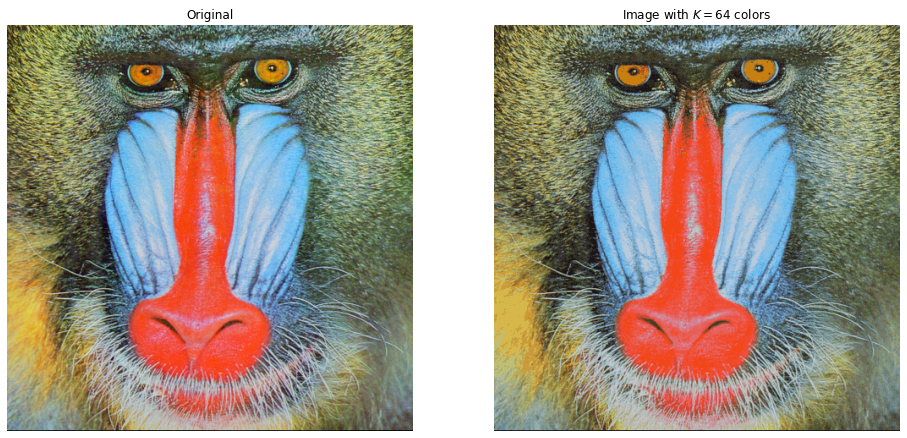

In [10]:
image_q = quantize_colors(image,64)

plt.figure(1,figsize=(16,8))
plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.title('Original')
plt.subplot(122)
plt.imshow(image_q)
plt.axis('off')
plt.title('Image with $K=64$ colors')
plt.show()

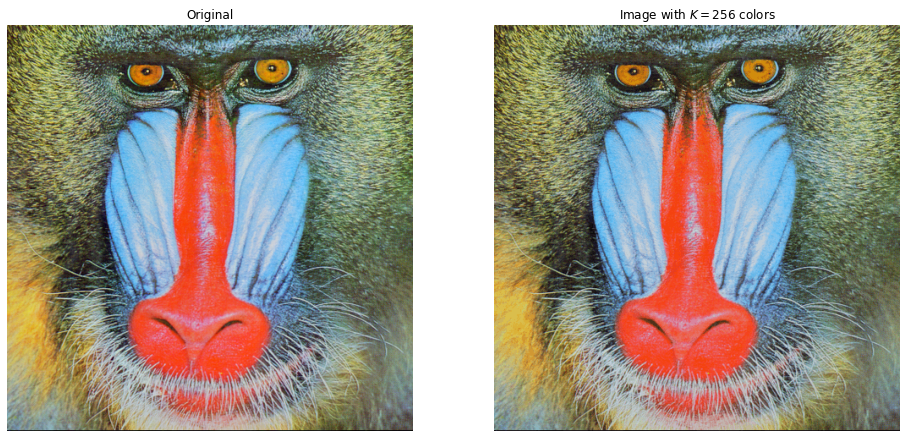

In [11]:
image_q = quantize_colors(image,256)

plt.figure(1,figsize=(16,8))
plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.title('Original')
plt.subplot(122)
plt.imshow(image_q)
plt.axis('off')
plt.title('Image with $K=256$ colors')
plt.show()